# 1. Business Understanding

- **Forecasting Power Output:** The primary goal is to accurately predict power output using historical environmental and temporal data. This forecasting is essential for efficient energy management, cost reduction, and optimizing operations within the energy sector.

- **Prediction Approach:** Since we aim to predict continuous values of power output, regression techniques are the appropriate modeling approach for this project.

- **Data Scope:** The project utilizes data collected over a period of 3 years, providing a substantial historical basis for accurate forecasting.

# 2. Data Understanding



We begin by importing the necessary libraries and loading the datasets.

In [2]:
import pandas as pd
import numpy as np

Load the training data (Train.csv), testing data (Test.csv), and the column information (column_info.csv).

In [3]:
df = pd.read_csv(r"C:\Users\GGPC\Desktop\Work\Personal Projects\Forcast Transactions\data\Train.csv")
df2 = pd.read_csv(r"C:\Users\GGPC\Desktop\Work\Personal Projects\Forcast Transactions\data\Test.csv")
df_col_info = pd.read_csv(r"C:\Users\GGPC\Desktop\Work\Personal Projects\Forcast Transactions\data\column_info.csv")

In [4]:
df_col_info.columns = ['variable', 'description']
df_col_info

variable                                        description
0       Time                                 Readings timestamp
1    Temp_2m                Temperature at 2 mtrs above surface
2  RelHum_2m          Relative Humidity at 2 mtrs above surface
3      DP_2m                  Dew Point at 3 mtrs above surface
4     WS_10m                Wind Speed at 10 mtrs above surface
5    WS_100m               Wind Speed at 100 mtrs above surface
6     WD_10m            Wind Direction at 10 mtrs above surface
7    WD_100m           Wind Direction at 100 mtrs above surface
8     WG_10m               Wind Gusts at 100 mtrs above surface
9      Power  Turbine power generation, normalized between 0...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  140160 non-null  int64  
 1   Time        140160 non-null  object 
 2   Location    140160 non-null  int64  
 3   Temp_2m     140160 non-null  float64
 4   RelHum_2m   140160 non-null  float64
 5   DP_2m       140160 non-null  float64
 6   WS_10m      140160 non-null  float64
 7   WS_100m     140160 non-null  float64
 8   WD_10m      140160 non-null  float64
 9   WD_100m     140160 non-null  float64
 10  WG_10m      140160 non-null  float64
 11  Power       140160 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 12.8+ MB


In [6]:
df.describe()

Unnamed: 0       Location        Temp_2m      RelHum_2m  \
count  140160.000000  140160.000000  140160.000000  140160.000000   
mean    17519.500000       2.500000      45.912162      70.420512   
std     10115.212797       1.118038      21.930554      17.000203   
min         0.000000       1.000000     -31.420400       8.664205   
25%      8759.750000       1.750000      29.579600      57.664205   
50%     17519.500000       2.500000      45.879600      72.664205   
75%     26279.250000       3.250000      64.579600      84.664205   
max     35039.000000       4.000000      94.479600      99.664205   

               DP_2m         WS_10m        WS_100m         WD_10m  \
count  140160.000000  140160.000000  140160.000000  140160.000000   
mean       35.867228       4.352948       6.924278     200.684417   
std        20.979720       2.027149       3.056636     100.079917   
min       -36.627405       0.165389       0.007799       0.051683   
25%        21.172595       2.815389       4.747799     128.051683   
50%        35.672595       4.055389       6.717799     211.051683   
75%        53.872595       5.575389       8.847799     287.051683   
max        78.272595      18.695389      24.597799     359.051683   

             WD_100m         WG_10m          Power  
count  140160.000000  140160.000000  140160.000000  
mean      200.649010       8.027673       0.312437  
std       101.105919       3.626641       0.253774  
min        -0.942685       0.436515      -0.000004  
25%       127.057315       5.236515       0.099696  
50%       211.057315       7.636515       0.246896  
75%       289.057315      10.236515       0.486396  
max       359.057315      28.936515       0.988796

# 3. Data Preparation

Define a function to transform the Time column into datetime format and extract new features like Month, Year, and TimeOfDay.

In [7]:
def transform_time(df):
    df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')
    df['Month'] = df['Time'].dt.month
    df['Year'] = df['Time'].dt.year
    df['TimeOfDay'] = df['Time'].dt.hour
    df.drop(columns='Time', inplace=True)
    df.drop(columns='Unnamed: 0', inplace=True)
    
    return df

train_df = transform_time(df)
test_df = transform_time(df2)

Preview the transformed datasets.

In [8]:
print(f'{train_df.head()}\n\n\n{test_df.head()}')

   Location  Temp_2m  RelHum_2m      DP_2m    WS_10m   WS_100m      WD_10m  \
0         1  28.2796  84.664205  24.072595  1.605389  1.267799  145.051683   
1         1  28.1796  85.664205  24.272595  2.225389  3.997799  150.051683   
2         1  26.5796  90.664205  24.072595  1.465389  2.787799  147.051683   
3         1  27.1796  87.664205  23.872595  1.465389  2.697799   57.051683   
4         1  27.0796  87.664205  23.672595  2.635389  4.437799   57.051683   

      WD_100m    WG_10m     Power  Month  Year  TimeOfDay  
0  161.057315  1.336515  0.163496      1  2013          0  
1  157.057315  4.336515  0.142396      1  2013          1  
2  149.057315  3.136515  0.121396      1  2013          2  
3  104.057315  1.536515  0.100296      1  2013          3  
4   83.057315  3.936515  0.079296      1  2013          4  


   Location  Temp_2m  RelHum_2m      DP_2m    WS_10m   WS_100m      WD_10m  \
0         1  19.6796  89.664205  17.072595  1.085389  0.867799  192.051683   
1         1  

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Location   140160 non-null  int64  
 1   Temp_2m    140160 non-null  float64
 2   RelHum_2m  140160 non-null  float64
 3   DP_2m      140160 non-null  float64
 4   WS_10m     140160 non-null  float64
 5   WS_100m    140160 non-null  float64
 6   WD_10m     140160 non-null  float64
 7   WD_100m    140160 non-null  float64
 8   WG_10m     140160 non-null  float64
 9   Power      140160 non-null  float64
 10  Month      140160 non-null  int32  
 11  Year       140160 non-null  int32  
 12  TimeOfDay  140160 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 12.3 MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   35040 non-null  int64  
 1   Temp_2m    35040 non-null  float64
 2   RelHum_2m  35040 non-null  float64
 3   DP_2m      35040 non-null  float64
 4   WS_10m     35040 non-null  float64
 5   WS_100m    35040 non-null  float64
 6   WD_10m     35040 non-null  float64
 7   WD_100m    35040 non-null  float64
 8   WG_10m     35040 non-null  float64
 9   Month      35040 non-null  int32  
 10  Year       35040 non-null  int32  
 11  TimeOfDay  35040 non-null  int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 2.8 MB


Verify data quality by checking for null values and duplicates in both datasets.

In [11]:
print(f'Train data Null:{train_df.isnull().sum().sum()} \nTest data Null:{test_df.isnull().sum().sum()}')

Train data Null:0 
Test data Null:0


In [12]:
print(f'Train data Duplicates: {train_df.duplicated().sum()} \nTest data Duplicates: {test_df.duplicated().sum()}')

Train data Duplicates: 0 
Test data Duplicates: 0


Calculate the correlation matrix to identify relationships between variables.

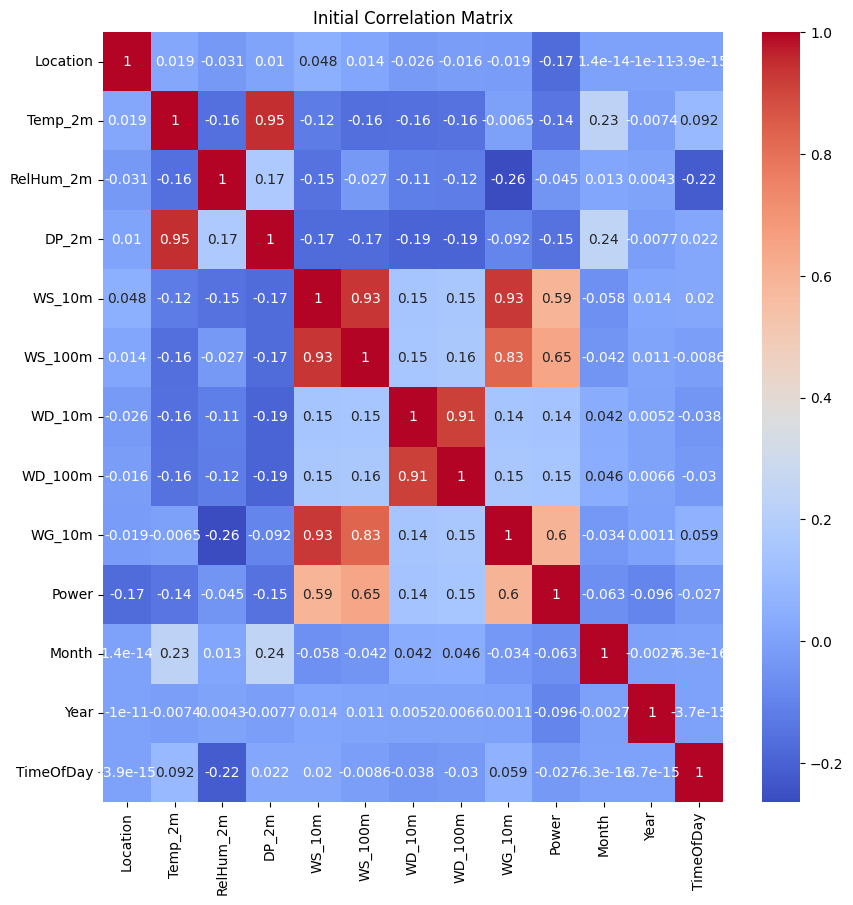

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Initial Correlation Matrix')
plt.show()

Flatten the correlation matrix and sort to find highly correlated feature pairs.

In [14]:
corr_df = (corr_matrix.unstack()
           .reset_index()
           .rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2', 0: 'correlation'})
           .query('variable_1 != variable_2')
           .sort_values(by='correlation', ascending=False))

print(corr_df.head(10))
        

    variable_1 variable_2  correlation
40       DP_2m    Temp_2m     0.946265
16     Temp_2m      DP_2m     0.946265
57      WS_10m    WS_100m     0.932316
69     WS_100m     WS_10m     0.932316
60      WS_10m     WG_10m     0.928090
108     WG_10m     WS_10m     0.928090
85      WD_10m    WD_100m     0.913419
97     WD_100m     WD_10m     0.913419
109     WG_10m    WS_100m     0.829831
73     WS_100m     WG_10m     0.829831


Visualize the correlation matrix again after removing the highly correlated feature.

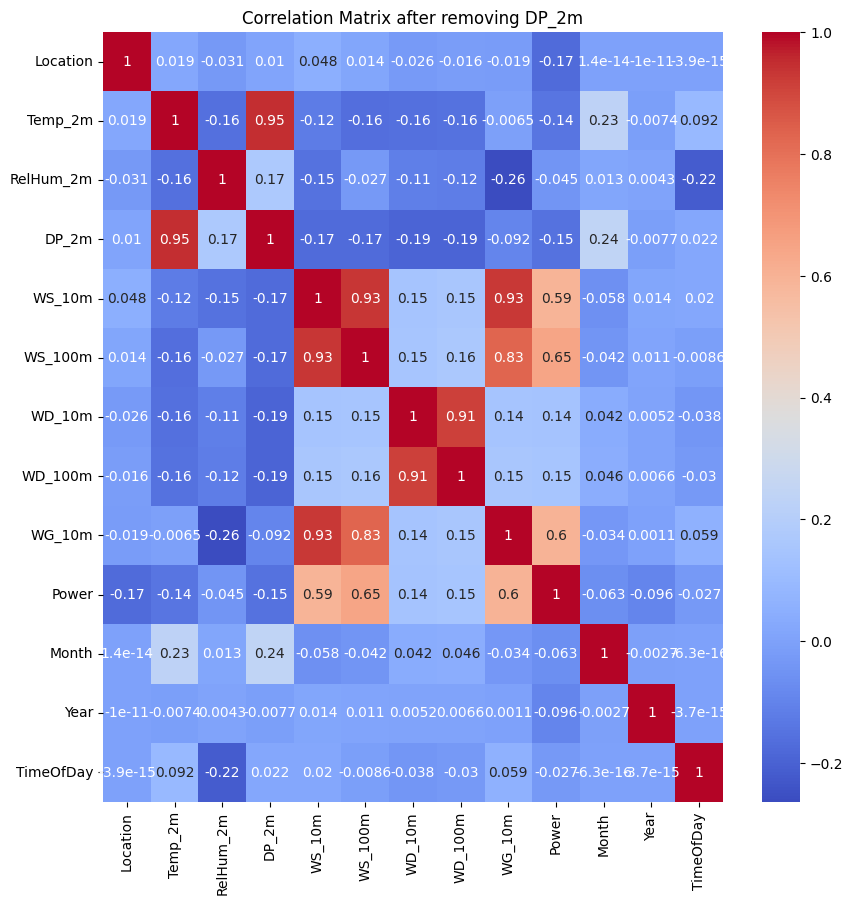

In [15]:
# Remove the DP_2m column due to high correlation with other features to reduce multicollinearity.
train_df.drop(columns='DP_2m', inplace=True)

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix after removing DP_2m')
plt.show()

# 4. Exploratory Data Analysis

Plot histograms for all features to understand their distributions.

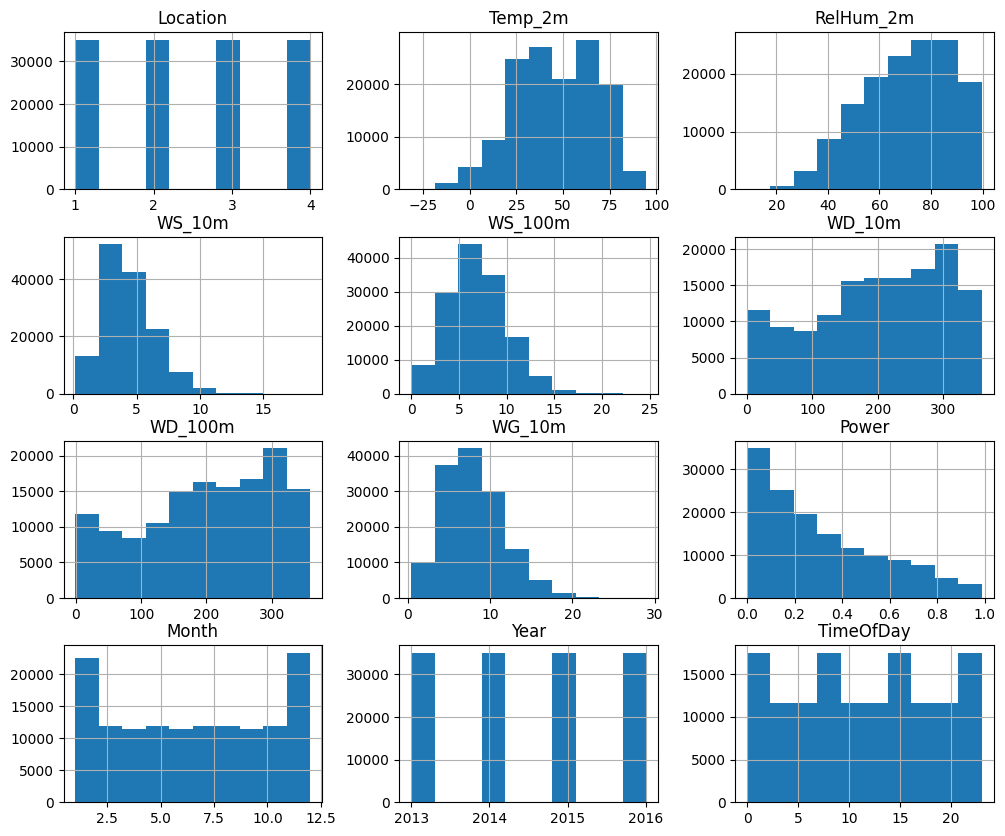

In [16]:
train_df.hist(figsize=(12, 10))
plt.show()

Create pair plots to visualize pairwise relationships between features and the target variable.

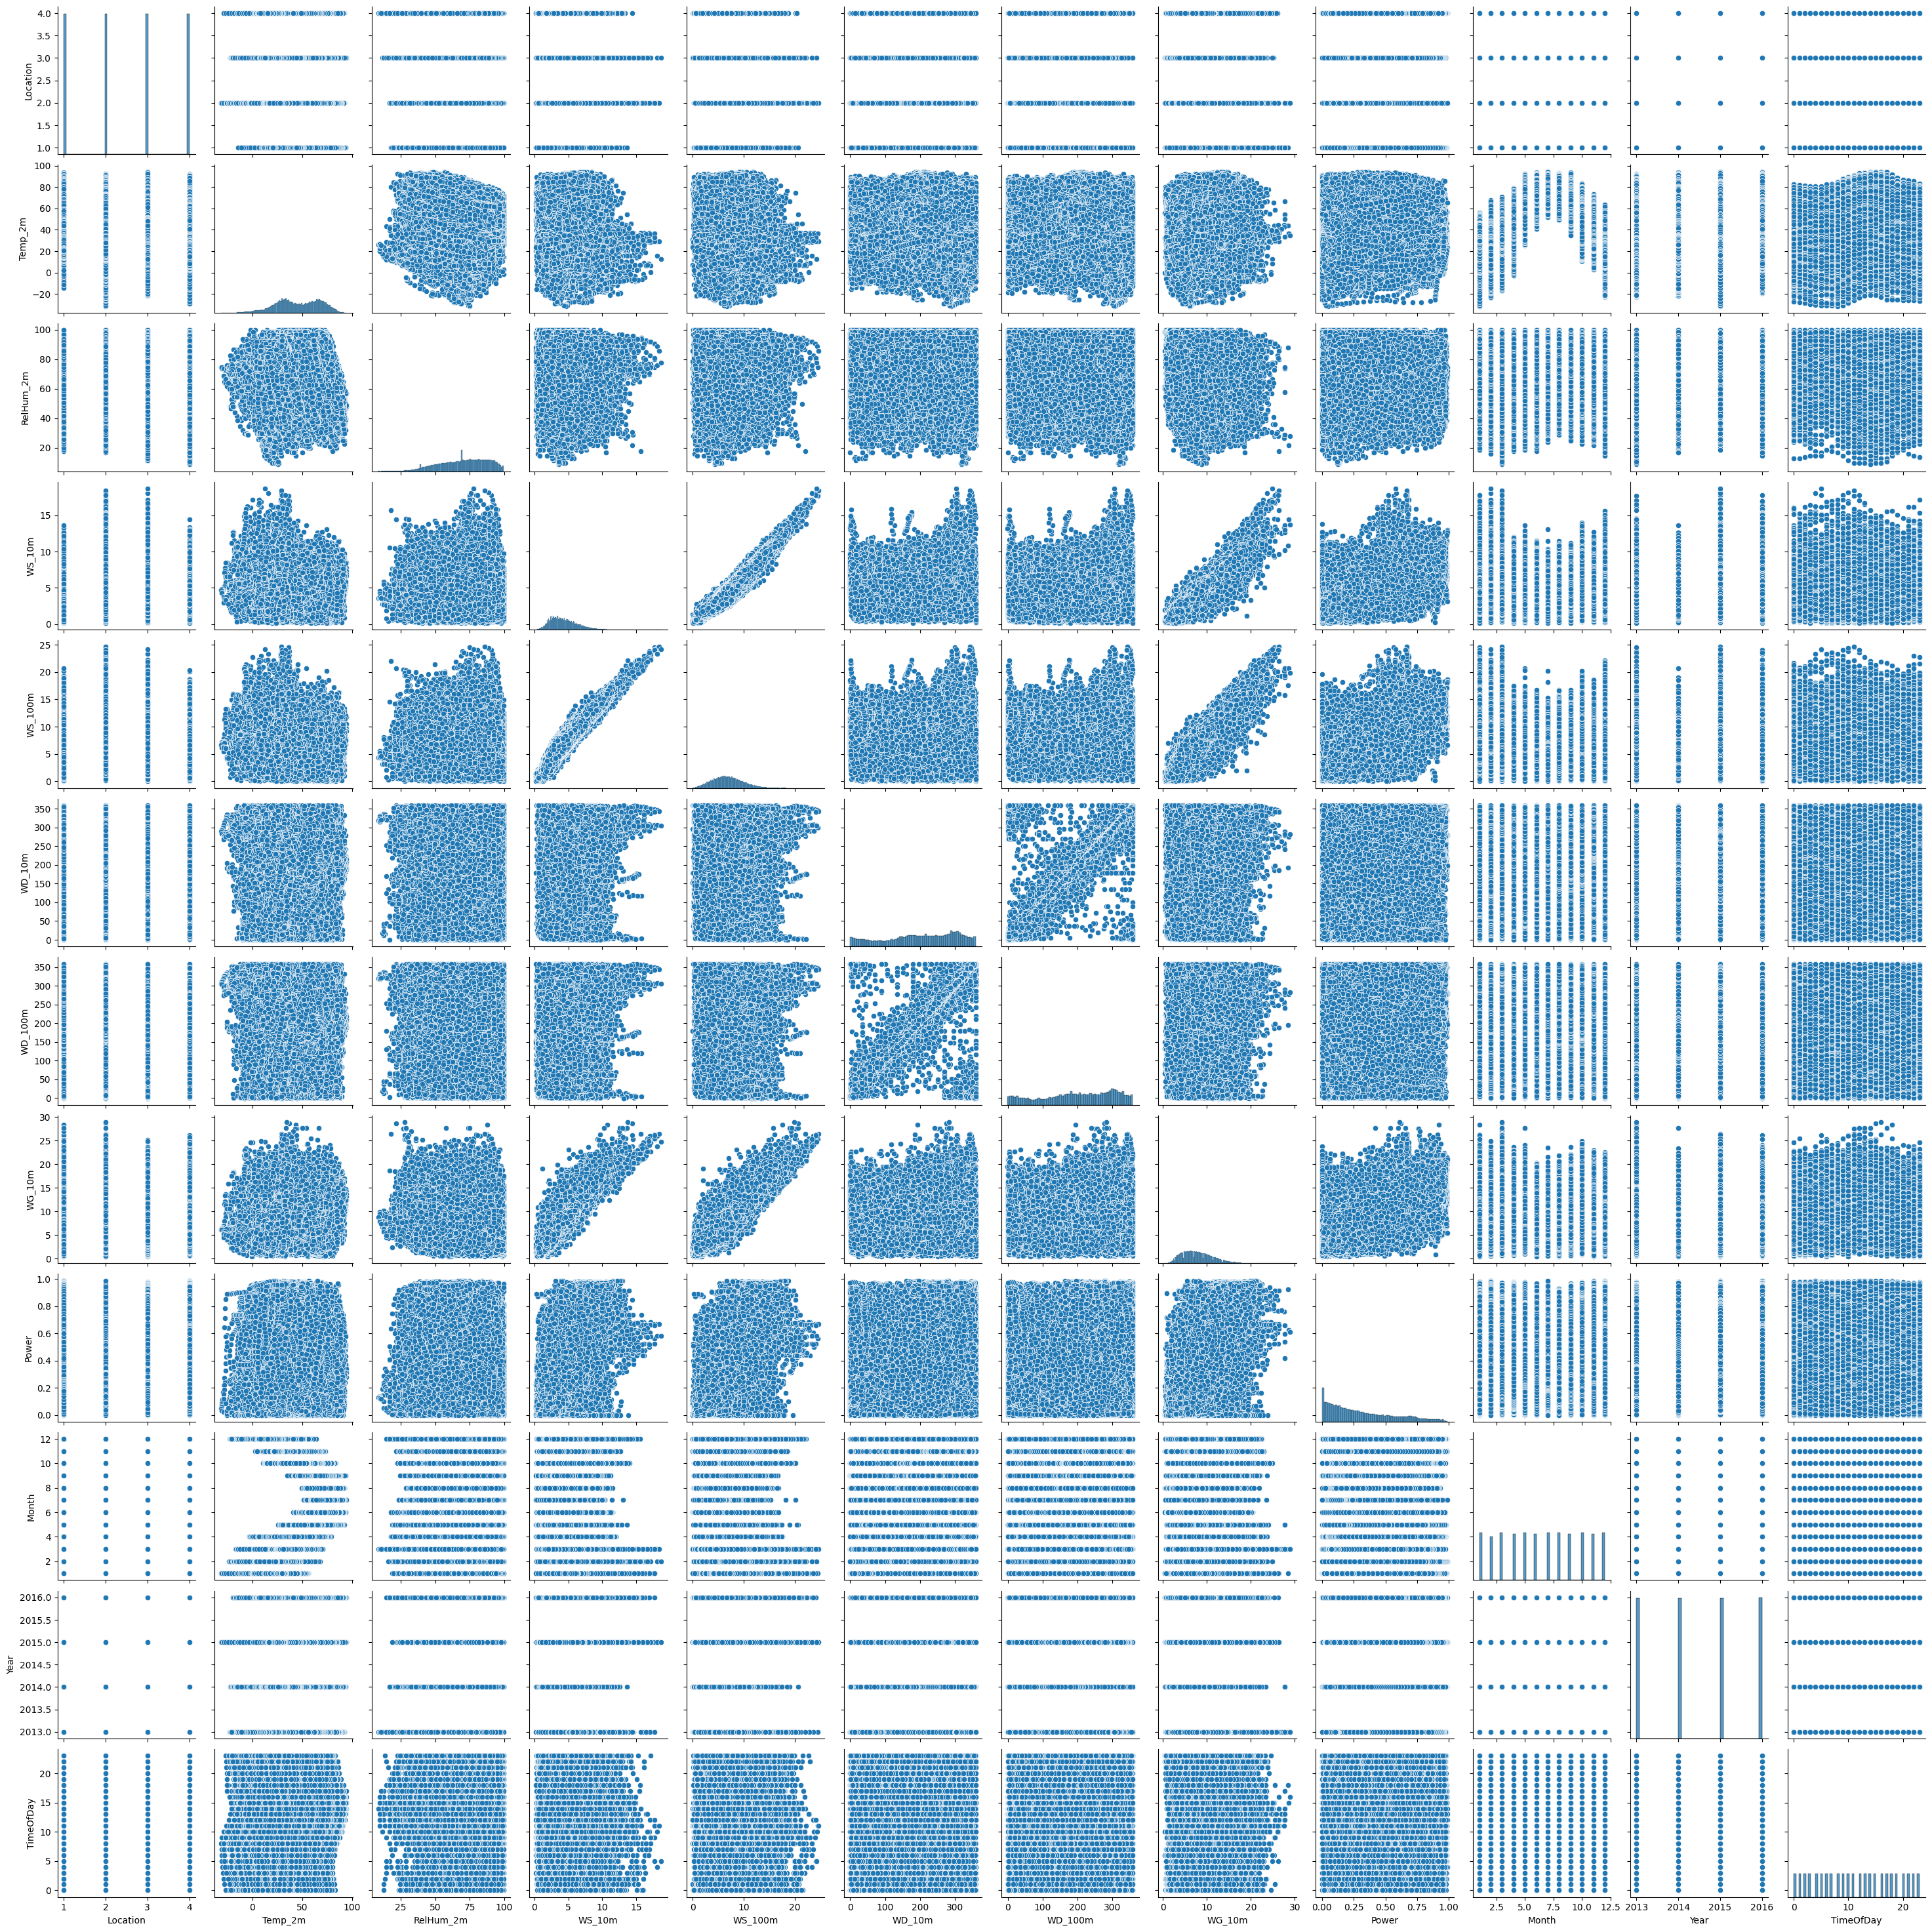

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(train_df)
plt.show()

Analyze how Power varies with TimeOfDay, Month, and Year.

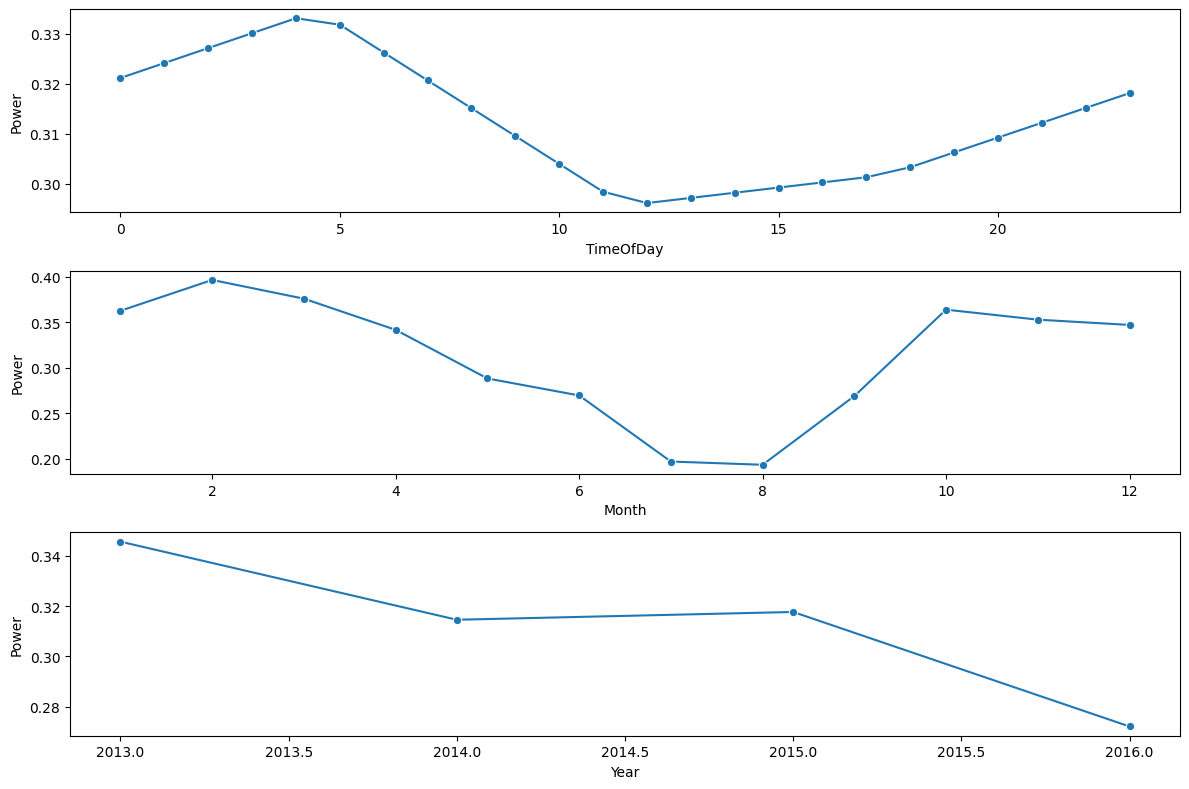

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

plt.subplot(311)
sns.lineplot(x='TimeOfDay', y='Power', data=train_df, marker='o', errorbar=None)

plt.subplot(312)
sns.lineplot(x='Month', y='Power', data=train_df, marker='o', errorbar=None)

plt.subplot(313)
sns.lineplot(x='Year', y='Power', data=train_df, marker='o', errorbar=None)

plt.tight_layout()
plt.show()

Investigate the monthly average wind speeds at 10 meters and 100 meters above the surface.

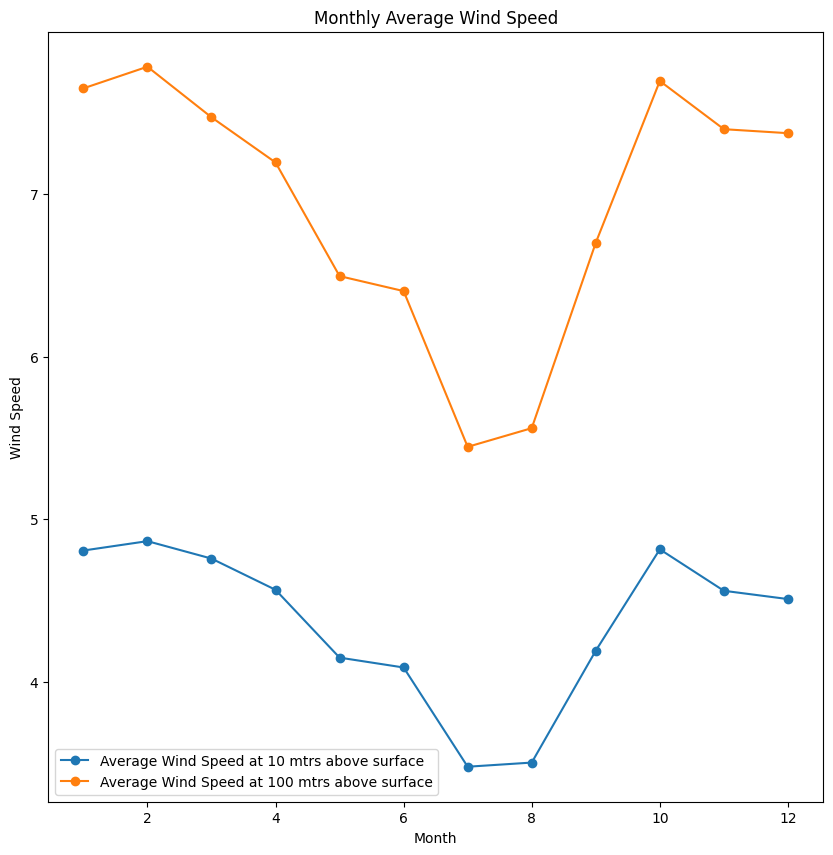

In [19]:
monthly_avg = train_df.groupby('Month').mean()[['WS_10m', 'WS_100m']]

plt.figure(figsize=(10, 10))

plt.plot(monthly_avg.index, monthly_avg['WS_10m'], label='Average Wind Speed at 10 mtrs above surface', marker='o')
plt.plot(monthly_avg.index, monthly_avg['WS_100m'], label='Average Wind Speed at 100 mtrs above surface', marker='o')

plt.title('Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

Plot the correlation coefficients of each feature with the target variable Power.

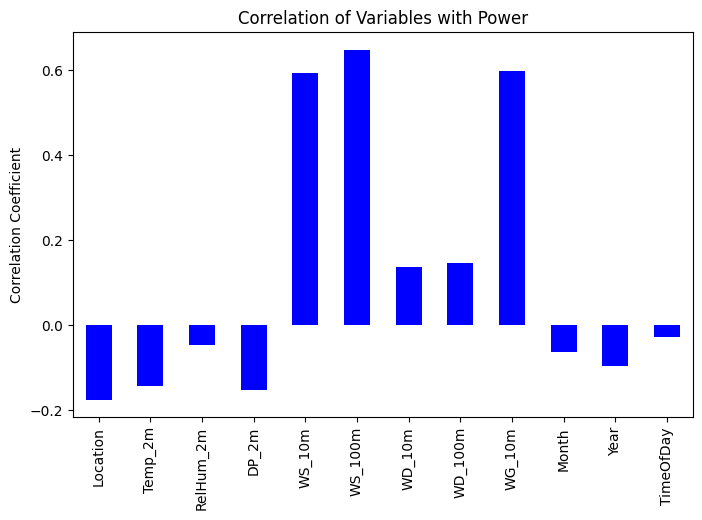

In [20]:
correlations_with_power = corr_matrix['Power'].drop('Power')
plt.figure(figsize=(8, 5))
correlations_with_power.plot(kind='bar', color='b')
plt.title("Correlation of Variables with Power")
plt.ylabel("Correlation Coefficient")
plt.show()


The purpose of performing convolution between different variables (such as weather, time, and location data) and the 'Power' variable is to analyze how these factors influence power generation or consumption over time. By using convolution, you are essentially combining two signals (in this case, a column from the dataset and the 'Power' variable) to identify patterns, relationships, and interactions between them.

In [21]:
def convolve_columns(df, target_column):
    convolution_results = {}
    for column in df.columns:
        if column != target_column:
            try:
                convolution_results[column] = np.convolve(df[column], df[target_column], mode='same')
            except:
                print(f'Error Convolving {column} with {target_column} Skipping...')
    return convolution_results

convol_dict = convolve_columns(train_df, 'Power')

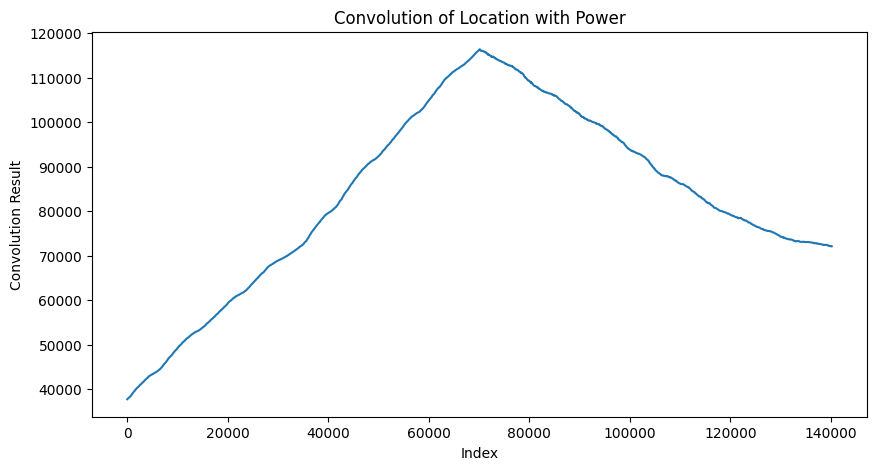

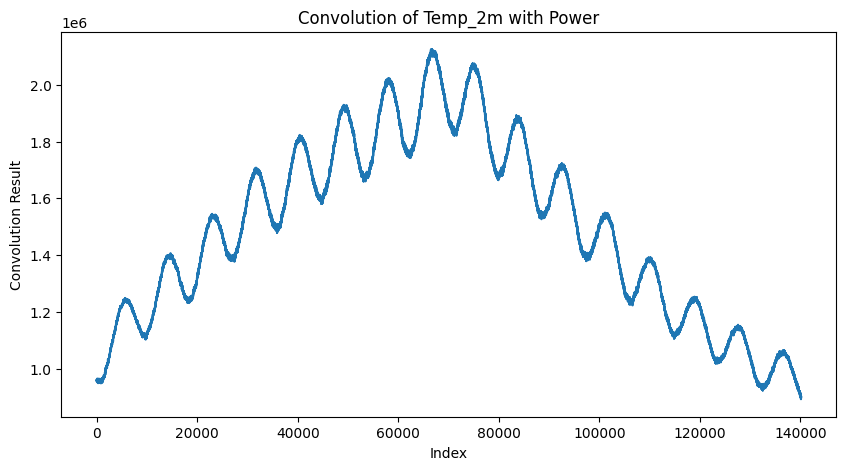

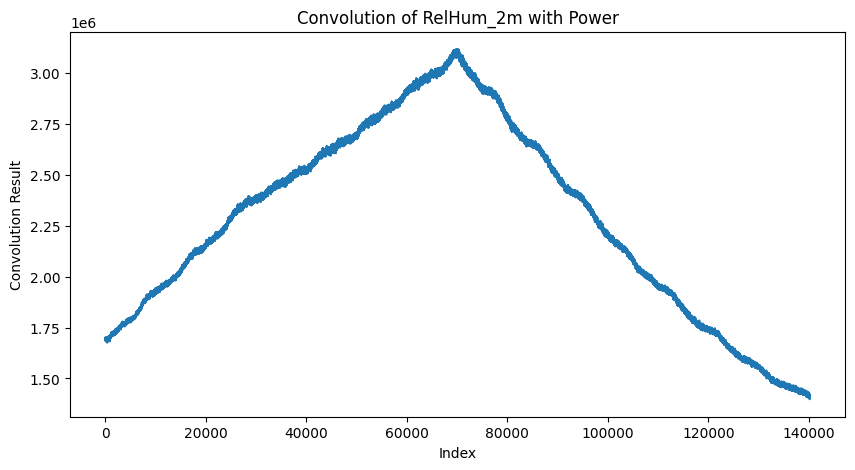

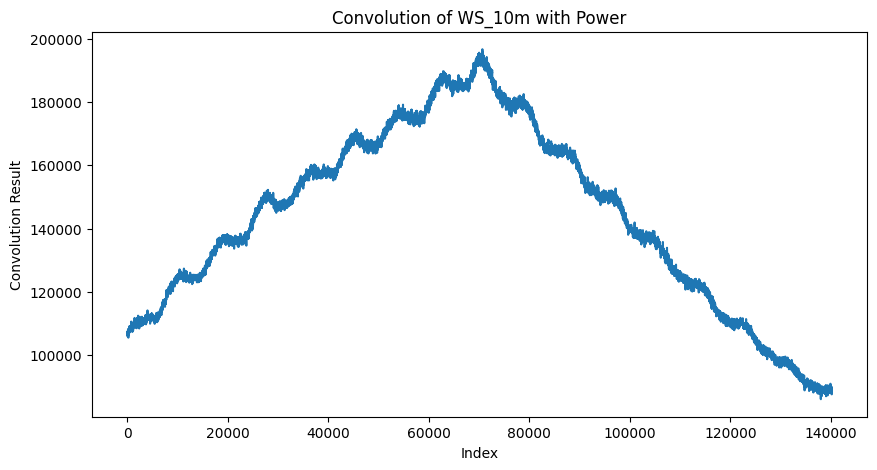

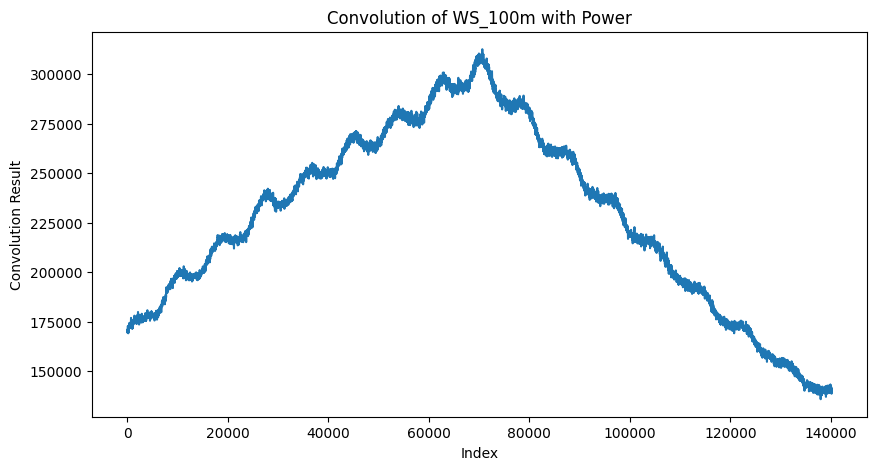

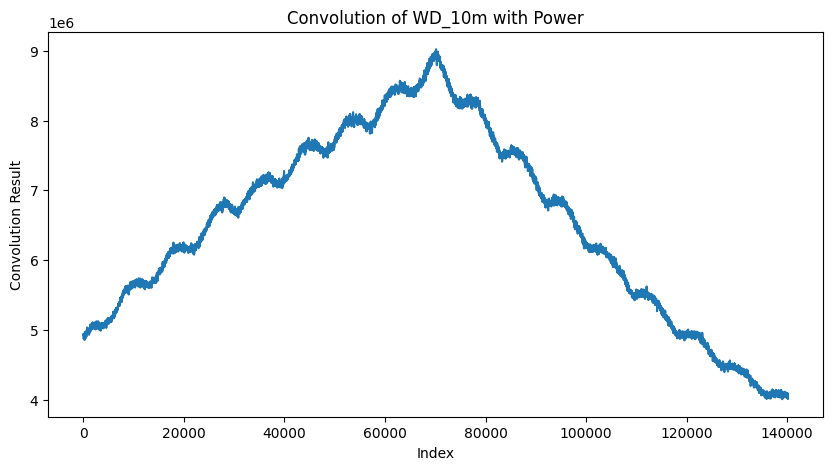

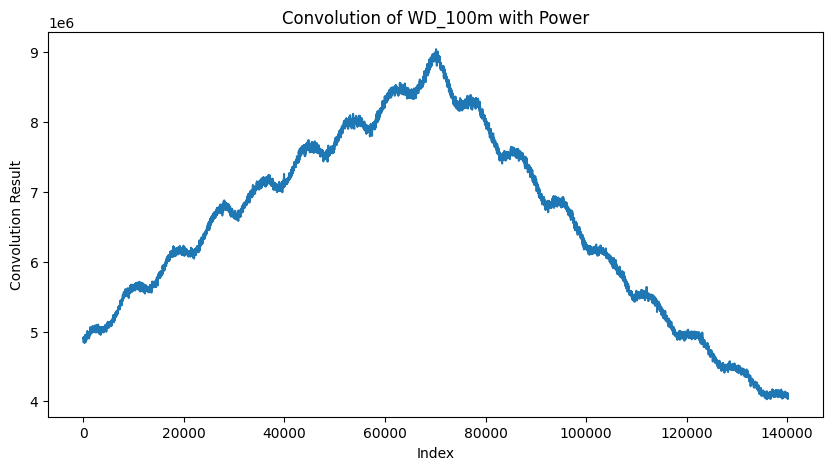

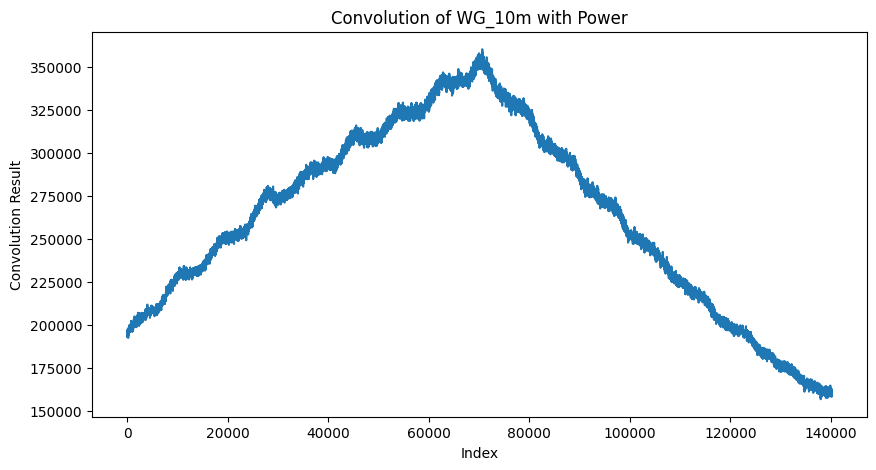

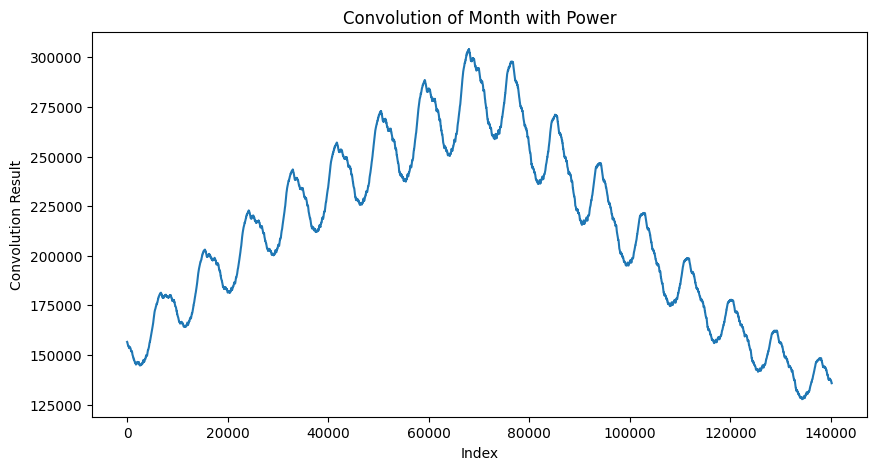

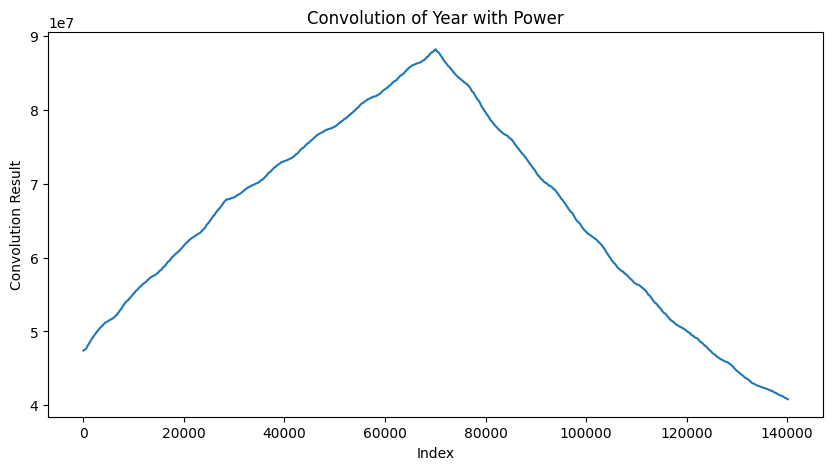

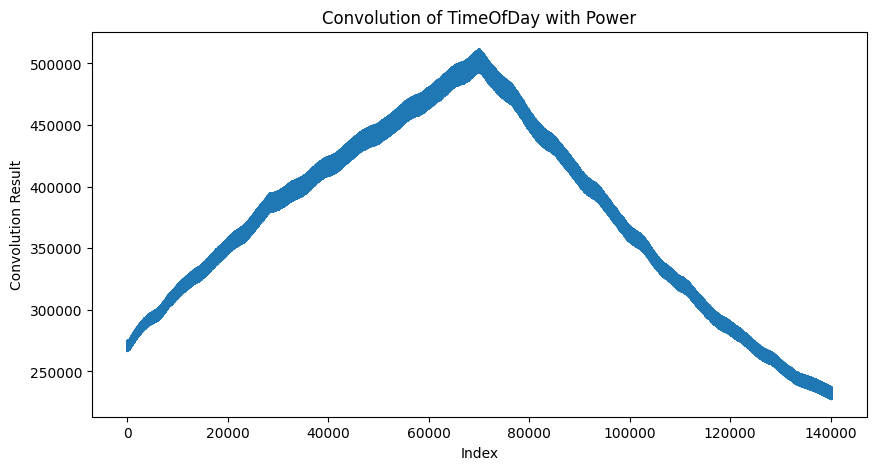

In [22]:
for column, convolution_result in convol_dict.items():
    plt.figure(figsize=(10, 5))
    plt.plot(convolution_result)
    plt.title(f"Convolution of {column} with Power")
    plt.xlabel("Index")
    plt.ylabel("Convolution Result")
    plt.show()

### 1. **Convolution of Location with Power**:
   - **Observation**: The graph has a smooth rise to a peak and then gradually declines, forming a symmetric curve.
   - **Insight**: This indicates that 'Location' has a consistent and gradually increasing influence on 'Power' over time until it peaks, after which the influence diminishes. The symmetry suggests that 'Location' affects power in a relatively balanced manner, with no sharp fluctuations. This could indicate a direct relationship, where power generation or usage increases steadily with respect to location factors like distance or geographical area.

### 2. **Convolution of Temp_2m with Power**:
   - **Observation**: The graph shows a wave-like pattern superimposed on a gradual rise and fall.
   - **Insight**: This suggests that temperature at 2 meters has a periodic influence on 'Power,' likely due to diurnal or seasonal temperature fluctuations. The peaks and valleys show that temperature changes have a cyclic effect on power, possibly increasing power usage during hot periods (due to air conditioning, for example) and decreasing during cooler periods. The overall rise and fall pattern indicates that temperature has a time-bound effect, peaking at a certain point and gradually diminishing.

### 3. **Convolution of RelHum_2m with Power**:
   - **Observation**: A smooth triangular pattern, rising steadily to a peak and then declining.
   - **Insight**: Relative humidity at 2 meters has a consistent, linear influence on 'Power,' similar to 'Location.' The steady rise indicates that as humidity increases, its impact on 'Power' becomes more significant, likely due to its influence on heating or cooling systems. The decline suggests that beyond a certain point, the effect diminishes. This relationship is smooth, meaning the impact of relative humidity changes predictably over time.

### 4. **Convolution of WS_10m with Power**:
   - **Observation**: A jagged, step-like pattern with a rise and fall.
   - **Insight**: Wind speed at 10 meters affects 'Power' in a more **non-linear** manner, with distinct jumps or fluctuations. This might be due to wind speed thresholds, where certain speeds cause significant changes in power generation (such as with wind turbines). The jagged nature reflects variability in wind speeds and their corresponding effects on power.

### 5. **Convolution of WS_100m with Power**:
   - **Observation**: Similar to the WS_10m graph, but with larger overall values and more pronounced peaks.
   - **Insight**: Wind speed at 100 meters has a similar but stronger influence on 'Power.' Since wind at higher altitudes tends to be stronger and more consistent, the effect is larger and more impactful. The periodic peaks and troughs indicate how changes in wind speed at different altitudes affect power generation or usage.

### 6. **Convolution of WD_10m with Power**:
   - **Observation**: A smooth rise and fall, with no significant jaggedness.
   - **Insight**: Wind direction at 10 meters influences 'Power' in a relatively steady manner, without the dramatic fluctuations seen with wind speed. This may suggest that wind direction has a more **consistent** impact on power generation, potentially guiding wind turbines or affecting air flow patterns.

### 7. **Convolution of WD_100m with Power**:
   - **Observation**: Similar to WD_10m but with larger values.
   - **Insight**: Wind direction at 100 meters follows the same trend as at 10 meters but with a larger influence, likely due to the more stable wind directions at higher altitudes. This steady influence might reflect directional consistency at higher altitudes, making it more reliable for energy generation.

### 8. **Convolution of WG_10m with Power**:
   - **Observation**: A jagged pattern similar to WS_10m, but with larger fluctuations.
   - **Insight**: Wind gusts (WG_10m) have a more sporadic influence on 'Power,' with sudden jumps that reflect their unpredictable nature. Wind gusts can cause spikes in energy generation or consumption (e.g., increased wind power generation or increased strain on power grids). The jagged nature highlights the irregularity of gusts compared to steady wind speeds.

### 9. **Convolution of Month with Power**:
   - **Observation**: A clear, periodic wave-like pattern with regular peaks and troughs.
   - **Insight**: The 'Month' variable shows a strong seasonal influence on 'Power,' with consistent, periodic peaks corresponding to certain months of the year. This is likely due to seasonal changes in energy consumption or production, such as higher energy usage in winter months for heating or in summer for cooling. The regularity of the pattern indicates a strong, predictable seasonal cycle.

### 10. **Convolution of Year with Power**:
   - **Observation**: A smooth, large-scale rise and fall.
   - **Insight**: The 'Year' variable shows a longer-term trend in its influence on 'Power.' The gradual increase followed by a peak and a decline might reflect technological advancements, population growth, or changes in energy policies or infrastructures that affect power generation or consumption over a longer time span. The smoothness suggests that these changes occur gradually over time, without sudden shifts.

### Updated General Observations:
- The convolution results provide a quantitative way to **analyze the relationship between variables** (like temperature, wind, and time) and power.
- **Peaks and troughs** in the graphs highlight periods of **maximum and minimum influence** of each variable on power, while the overall shape of the curves reflects the **nature of the relationship**—whether it is smooth, periodic, or jagged.
- **Weather-related variables** (temperature, wind speed, humidity) exhibit more **cyclic or periodic patterns**, showing how natural environmental factors impact power usage or generation on a seasonal or daily basis.
- **Time-related variables** (month, year) display longer-term trends, with periodic or gradual effects on power, likely driven by seasonal cycles or long-term shifts in energy consumption patterns.

These insights provide a clearer understanding of how different environmental factors and time affect power usage or production, revealing both **cyclic patterns** and **gradual trends** in the data.

# 5. Model Training & Evaluation

Import necessary libraries for model training and evaluation.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

Ensure the test dataset matches the training dataset by dropping the DP_2m column.

In [24]:
# Remove the DP_2m column due to high correlation with other features to reduce multicollinearity.
test_df.drop(columns='DP_2m', inplace=True)

Prepare the feature matrix X and target vector y, and apply Min-Max scaling to numerical features.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

X = train_df.drop(columns='Power')
y = train_df['Power']

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    [
        ('MinMaxScaler', numeric_transformer, num_features),
    ]
)

In [26]:
X = preprocessor.fit_transform(X)
X.shape

(140160, 11)

Define a function to evaluate models using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

Split the data into training and testing sets to assess the model's generalization.

In [28]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((112128, 11), (28032, 11))

Initialize a dictionary of regression models to evaluate.

In [29]:
models = {
    'LinearRegression': LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

Train each model and evaluate their performance on both the training and testing datasets.
It is important to check both training and testing results to ensure that the model is not overfitting.

In [30]:
model_list = []
r2_score_list = []
mae_list = []
    
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_mse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_mse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(f'- Mean Absolute Error: {model_train_mae:.4f}')
    print(f' - R2 Score: {model_train_r2:4f}')

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f'- Mean Absolute Error: {model_test_mae:.4f}')
    print(f' - R2 Score: {model_test_r2:4f}')
    
    r2_score_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Mean Absolute Error: 0.1384
 - R2 Score: 0.505355
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.1403
 - R2 Score: 0.492294


Lasso
Model performance for Training set
- Mean Absolute Error: 0.2125
 - R2 Score: 0.000000
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.2122
 - R2 Score: -0.000039


Ridge
Model performance for Training set
- Mean Absolute Error: 0.1384
 - R2 Score: 0.505339
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.1403
 - R2 Score: 0.492322


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 0.0538
 - R2 Score: 0.897932
----------------------------------
Model performance for Test set
- Mean Absolute Error: 0.0731
 - R2 Score: 0.824192


Decision Tree
Model performance for Training set
- Mean Absolute Error: 0.0000
 - R2 Score: 1.000000
-------------------

Compile the evaluation metrics into a DataFrame for comparison.

In [31]:
pd.DataFrame(list(zip(model_list, r2_score_list, mae_list)), 
            columns=['Model Name', 'R2 Score', 'MAE']).sort_values(by=['R2 Score'], 
            ascending=False)

Model Name  R2 Score       MAE
3    K-Neighbors Regressor  0.824192  0.073055
5  Random Forest Regressor  0.776302  0.086155
4            Decision Tree  0.559951  0.112014
2                    Ridge  0.492322  0.140277
0         LinearRegression  0.492294  0.140275
6       AdaBoost Regressor  0.475720  0.153964
1                    Lasso -0.000039  0.212220

Best performing model is K-Neighbors Regressor

Train the K-Neighbors Regressor on the entire training set and evaluate its performance.

In [32]:
K_model = KNeighborsRegressor()
K_model.fit(X_train, y_train)

y_pred = K_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f'R2 score: {score:.2f}%')

R2 score: 82.42%


Create a DataFrame to compare the actual and predicted values along with their differences.

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
24950       0.387496         0.376016     0.01148
17553       0.692396         0.322356     0.37004
19265       0.580596         0.692156    -0.11156
32546       0.169296         0.166896     0.00240
67423       0.001196         0.006836    -0.00564
...              ...              ...         ...
26519       0.641096         0.817176    -0.17608
213         0.909396         0.911676    -0.00228
131967      0.100796         0.054536     0.04626
11856       0.589596         0.598836    -0.00924
94438       0.225896         0.292056    -0.06616

[28032 rows x 3 columns]

Calculate the mean difference between the actual and predicted values to assess the model's accuracy.

In [34]:
mean_difference = pred_df['Difference'].mean()
print(f'Mean difference: {mean_difference:.4f}')

Mean difference: 0.0012


# Conclusion

In this project, we successfully developed a predictive model to forecast power output using historical environmental and temporal data over a three-year period. The primary objective was to enhance energy management efficiency by accurately predicting continuous power output values based on factors such as wind speed, temperature, pressure, and time-related variables.